# 1. Training a machine learning Model

## Loading the data

In [41]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn import metrics

# start 'bunch' object containing iris dataset and its attributes
iris = load_iris()

# start feature matrix in "X"
X = iris.data

# store response vector in "y"
y = iris.target

In [3]:
# print the shape of X and y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


## sklearn 4 step modelling pattern

#### Step 1: Import the class you plan to use

from sklearn.neighbors import KNeighborsClassifier

#### Step 2: "Instantiate" the "estimator" (aks model)
- "Estimator" is sklearn's term for model
- "Instantiate" means "make an instance of"

In [7]:
knn = KNeighborsClassifier(n_neighbors=1)

- Name of the object does not matter
- Can specify tunning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to default

In [8]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


#### Step 3: Fit the model with the data (aka "model training")
- Model is learning the relationship between X and y
- Occurs in-place

In [9]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

#### Step 4: Predict the response for a new observation
- New observations are called "out of sample" data
- Uses the information it learned during the model training process

In [20]:
knn.predict([[3, 5, 4, 2]])

array([2])

- Returns a NumPy array
- Can predict for multiple observations at once

In [42]:
# note that the the sklearn input needs to be 2D array, thus needs two []s
# the below example and show the diff
print(np.array([3, 5, 4, 2]).shape, np.array([[3, 5, 4, 2]]).shape)

(4,) (1, 4)


In [27]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)

array([2, 1])

## Using a different value for K

In [45]:
# instantiate the model (using the value k = 5)
knn = KNeighborsClassifier(n_neighbors = 5)

# fit the model with data
knn.fit(X, y)

# predict the respsonse for new observations
knn.predict(X_new)

array([1, 1])

## Using a different classification model

In [50]:
# import the class
from sklearn.linear_model import LogisticRegression

# instatiate the model (using default parameters)
logreg = LogisticRegression(max_iter=1000)

# fit the model with data
logreg.fit(X, y)

# predict the response for the new observations
logreg.predict(X_new)

# when running the code, I got the warning message of "max iterations have been reached and the model failed to converge". 
# what I did was that I updated the max_iter haperparameter from the default 100 to 1000, so that the model parameters
# can converge

array([0, 0])

# 2. Comparing machine learning model

## Evaluation procedure #1: train and test on the same entire data

### Logistic regression

In [51]:
# store the predicted response values
y_pred = logreg.predict(X)
len(y_pred)

150

#### Classfication accuracy:
- Proportion of correct predictions
- Common evaluation metric for classification problems

In [52]:
# compute classification accuracy for the logistic regression
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


- Known as training accuracy when you train and test on the same data

### KNN

In [58]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9666666666666667


In [60]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


There is issue with the knn model with n = 1 -> the training and test are on the same model, and it's based on the nearest neighbor, thus, the assignments will be the same.

### Problems with training and testing on the same data
- Goal is to estimate the performance of out-of-sample data
- Maximizaing the training data accuracy will rewards overly complex model that won't generalize
- Overfit the training data

## Evaluation procedure #2: train / test split
- Split the dataset into two pieces: a training set and a test set
- Train the model on training set
- Test the model on testing set, and evaluate how well we did

In [61]:
# print the shapes of X and y
print(X.shape, y.shape)

(150, 4) (150,)


In [72]:
# Step 1: split X and y into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 4)
# random state is to fix the split every time
print(X_test.shape, y_test.shape)

(60, 4) (60,)


In [73]:
# Step 2: train the model on training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
# Step 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


### Repeat for KNN with K = 5

In [75]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


### Repeat for KNN with K = 1

In [77]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


### Can we locate even better value for K?

In [83]:
# try K = 1 through K = 25 and record the testing accuracy
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

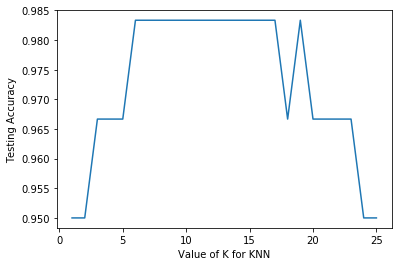

In [86]:
import matplotlib.pyplot as plt
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [95]:
# if it's not clear enough in the graph, let's see the values side by side
pd.DataFrame(k_range, scores)
# the Ks that give best performance are 6-17 and 19

,0
0.950000,1
0.950000,2
0.966667,3
0.966667,4
0.966667,5
0.983333,6
0.983333,7
0.983333,8
0.983333,9
0.983333,10


- Training accuracy raises as model complexity increases
- Testing accuracy penelizes models that are too complex or not complex enough
- For KNN models, complexity is determined by the value of K (lower value = **more** complex)

### Making predictions on out-of-sample data

For out-of-sample data predicton, we use the parameters selected by the training set but use the full data to train the model instead of just training data

In [96]:
# instantiate the model with the best known parameters
knn = KNeighborsClassifier(n_neighbors=11)

# train the model with X and y (not X_train and y_train)
knn.fit(X, y)

# make a prediction for an out-of-sample observation
knn.predict([[3, 5, 4, 2]])

array([1])

### Downside of train / test split

- Provide a high variance estimate of out-of-sample accuracy (this it because the results can be affected due to the randomness of which data are assigned to the train vs. test sets)
- K-fold cross-validation overcomes this limitation
- However, train / test split still is useful because if its flexibility and speed

# 3. Linear regression

In [12]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv', 
                   index_col = 0)
# index_col = 0 is to set the column index to the 0th column
# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [13]:
data.shape

(200, 4)

## Visualizing data using seaborn
#### Seaborn: Python library for visualization built on top of Matplotlib

In [15]:
import seaborn as sns

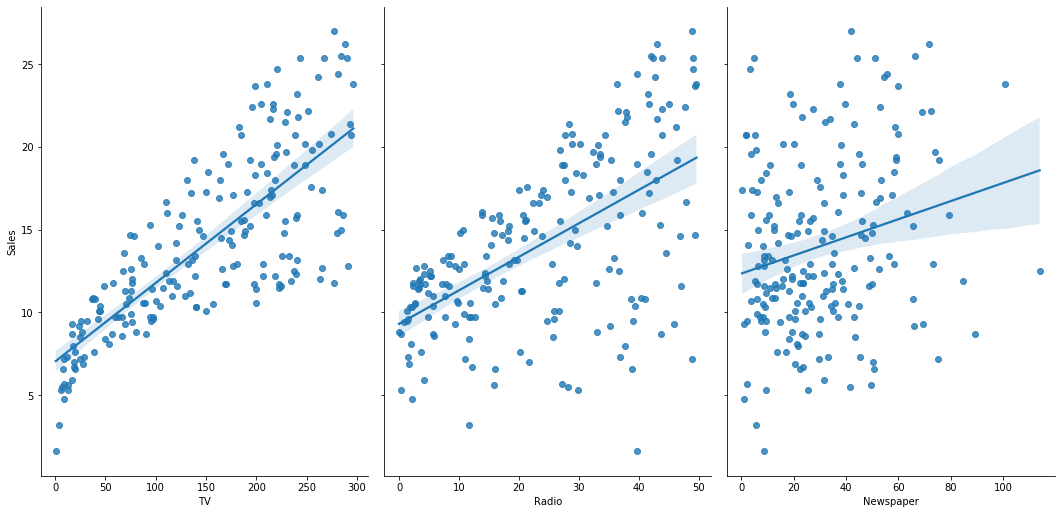

In [19]:
# visualize the relationship between the features and the response using scatterplot
sns.pairplot(data, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', height = 7, aspect = 0.7, kind = 'reg')

## Linear Regression
**Pros**: fast, no tunning required, highly interpretable, well-understood <br>
**Cons**: unlikely to produce the best predictive accuracy since it presumes a linear relationship between the feature and response

### Preparing X and y using pandas

In [24]:
feature_cols = ['TV', 'Radio', 'Newspaper']

X = data[feature_cols]

X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [25]:
y = data['Sales']

In [26]:
## Splitting X and Y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [28]:
# deafult split is 25% for testing 
print(X_train.shape, X_test.shape)

(150, 3) (50, 3)


### Linear regression in sklearn

In [30]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
#### Interpreting model coefficient
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [33]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04656456787415028),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804347)]

> we notice that there is a weaker coef of Newspaper (info for feature selection)

#### How do we interpret the TV coefficient (0.0466)?

- For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.
- Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items. 

#### Important notes:
- This is a statement of association, not causation.

### Making predictions

In [36]:
y_pred = linreg.predict(X_test)

### Model evaluation metrics for regression

- Mean Absolute Error (MAE): average of errors
- Mean Squared Error (MSE): MSE punishes large errors
- Root Mean Sqaured Error (RMSE): RMSE punishes large errors and is interpretable in the 'y' units
Thus, we choose RMSE as our metrix

In [42]:
### Computing the RMSE for our Sales predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328955


### Feature selection

Does **Newspaper** "belong" in our model? In other words, does it improve the quality of our predictions?

Let's **remove** it from the model and check the RMSE!

In [59]:
# create a list of feature names
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
y = data.Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888


The RMSE decreased when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

Reference: Kevin's longer notebook about [linear regression](https://github.com/justmarkham/DAT5/blob/master/notebooks/09_linear_regression.ipynb). Addtional to what's covered here, this contains hypothesis testing, CI, p-value, categorical values, linear regression with statsmodels.formula.api (somewhat like R) and summary table.

# 4. Selecting the best model in sklearn using cross-validation

As we knew, train/test split method provides a high variance estimate since changing which observations happen to be in the testing set can significantly change testing accuracy.<br><br>
**Question:** What if we create a bunch of train/test splits, calculated the testing accuracy for each, and averaged the results together?<br>
**Answer:** That's the essense of the cross-validation

## Steps for K-fold cross-validation
- Split the dataset into K **equal** partitions (or "folds")
- Use fold 1 as the **testing set** and the union of the other folds as the **training set**
- Calculate **testing accuracy**
- Repeat step 2 and 3 K times, using a **different fold** as the testing set each time
- Use the **average testing accuracy** as the estimate of out-of-sample accuracy <br>
Diagram of **5-fold cross-validation:** <br>
<img src="pics/kfolds.png" alt="kfolds" style="width: 600px;"/>

### Comparing cross-validation to train/test split
Advantages of cross-validation:
- More accurate estimate of out-of-sample accuracy
- More 'efficient' use of data (every obs are in use)
Advantages of train/test split:
- K times faster than K-fold cross-validation
- Simpler to examine the detailed results on the testing process

### Cross-validation recommendations
1. K can be any number but generally **K = 10** is recommended
- For classification problems, **stratified sampling** is recommended for creating the folds (especially for imbalance data)
    - Each response class should be represented with equal proportions in each of the K folds
    - sklearn's cross_val_score function does this by default

### Cross-validation example: parameter tuning
Goal: Select best tunning parameters for KNN on the iris dataset

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [96]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

In [77]:
# 10 fold cross-validation with K = 5 for KNN
knn = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [79]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.9666666666666668


In [85]:
# search for an optimal K value for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Cross-Validated accuracy')

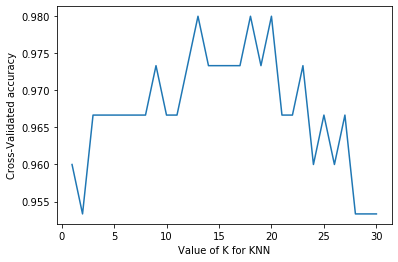

In [86]:
import matplotlib.pyplot as plt
# plot the value of K for KNN versus the cross-validated accuracy
plt.plot(k_range, k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated accuracy")

### Cross-validation example: model selection
Goal: Compare the best KNN model with logistic regression on the iris dataset

In [97]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors = 20)
print(cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy').mean())

0.9800000000000001


In [90]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 1000)
print(cross_val_score(logreg, X, y, cv = 10, scoring = 'accuracy').mean())

0.9733333333333334


### Cross-validation example: feature selection
Goal: Select wheather the Newspaper feature should be included in the linear regression model in the advertising dataset

In [92]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [100]:
# create a Python list of three feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the DataFrame (X)
X = data[feature_cols]

# select the Sales column as the response (y)
y = data.Sales

In [101]:
# 10-fold cross-validation with all three features
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv = 10, scoring = 'neg_mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


>Due to the design of the 'scoring', which always maxmize the score, the MSE is set to negative values. 

In [104]:
# fix the sign for MSE scores
mse_scores = -scores

In [103]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]


In [105]:
# calculate the average RMSE
print(rmse_scores.mean())

1.6913531708051792


In [117]:
# 10-fold cross-validation with two features (excluding Newspaper)
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv = 10, scoring = 'neg_mean_squared_error')).mean())

1.6796748419090766


### Improvements to cross-validation
#### Repeated cross-validation

- Repeat cross-validation multiple times (with different random splits of the data) and average the results
- More reliable estimate of out-of-sample performance by reducing the variance associated with a single trial of cross-validation

#### Creating a hold-out set 
- "Hold out" a portion of the data before beginning the model building process
- Locate the best model using cross-validation on the remaining data, and test it using the hold-out set
- More reliable estimate of out-of-sample performance since hold-out set is truly out-of-sample

#### Feature engineering and selection within cross-validation iterations
- Normally, feature engineering and selection occurs before cross-validation
- Instead, perform all feature engineering and selection within each cross-validation iteration
- More reliable estimate of out-of-sample performance since it better mimics the application of the model to out-of-sample data

# 5. GridSearch for optimal tunning parameters

Simliar to the operation we did just now, GridSearch makes it easy by allowing you define a grid of parameters that will be searched using K-fold cross-validation

In [111]:
from sklearn.model_selection import GridSearchCV

In [118]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

In [112]:
# deinf the parameter values to be searched
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [114]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors = k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [115]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv= 10, scoring = 'accuracy', return_train_score = False)

>You can set n_jobs = -1 to run computations in parallel

In [119]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=20, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [122]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.960000,0.053333,{'n_neighbors': 1}
1,0.953333,0.052068,{'n_neighbors': 2}
2,0.966667,0.044721,{'n_neighbors': 3}
3,0.966667,0.044721,{'n_neighbors': 4}
4,0.966667,0.044721,{'n_neighbors': 5}
5,0.966667,0.044721,{'n_neighbors': 6}
6,0.966667,0.044721,{'n_neighbors': 7}
7,0.966667,0.044721,{'n_neighbors': 8}
8,0.973333,0.032660,{'n_neighbors': 9}
9,0.966667,0.044721,{'n_neighbors': 10}


In [123]:
# examine the first result
print(grid.cv_results_['params'][0])
print(grid.cv_results_['mean_test_score'][0])

{'n_neighbors': 1}
0.96


In [126]:
# print the array if mean scores only
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.96       0.95333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.97333333 0.96666667 0.96666667 0.97333333
 0.98       0.97333333 0.97333333 0.97333333 0.97333333 0.98
 0.97333333 0.98       0.96666667 0.96666667 0.97333333 0.96
 0.96666667 0.96       0.96666667 0.95333333 0.95333333 0.95333333]


Text(0, 0.5, 'Cross-Validation Accuracy')

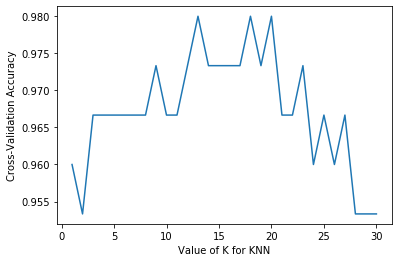

In [128]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')

>to directly choose the best model with grid.best_xx

In [130]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9800000000000001
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')


## Searching multiple parameters simultaneously
- Examine: tunning max_depth and min_samples_leaf for DecisionTreeClassifier
- Could tune parameters independently: change max_depth while laeving min_sample_leaf at its default value, and vice versa
- Best performance might be achieved when neither parameter is at its default value

In [132]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

In [140]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors = k_range, weights = weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [141]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=20, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [142]:
# view the results
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.960000,0.053333,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.960000,0.053333,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.953333,0.052068,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.960000,0.053333,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.966667,0.044721,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.966667,0.044721,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.966667,0.044721,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.966667,0.044721,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.966667,0.044721,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.966667,0.044721,"{'n_neighbors': 5, 'weights': 'distance'}"


In [147]:
# examine the best model
print(grid.best_score_, grid.best_params_)

0.9800000000000001 {'n_neighbors': 13, 'weights': 'uniform'}


## Using the best parameters to make predictions

In [150]:
# train your model using ALL data and the best parameters
knn = KNeighborsClassifier(n_neighbors = 13, weights = 'uniform')
knn.fit(X, y)

# make a prediction on out-of-sample data
knn.predict([[3, 5, 4, 2]])

array([1])

>GridSearchCV automatically refits the best model using ALL of the data

In [151]:
# shortcut: 
grid.predict([[3, 5, 4, 2]])

array([1])

## Reducing computational expense using RandomizedSearchCV
- Searching many different parameters at once may be computationally infeasible
- RandomizedSearchCV searches a subset of the parameters and you control the computational 'budget'

In [154]:
from sklearn.model_selection import RandomizedSearchCV

In [157]:
# specify 'parameter distribution' rather than a 'parameter grid'
param_dist = dict(n_neighbors = k_range, weights = weight_options)

>Important: Specify a continuous distribution (rather than a list of value) for any continuous paramters

In [158]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(knn, param_dist, cv = 10, scoring = 'accuracy', n_iter = 10, random_state = 5, 
                         return_train_score = False)
rand.fit(X, y)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.973333,0.032660,"{'weights': 'distance', 'n_neighbors': 16}"
1,0.966667,0.033333,"{'weights': 'uniform', 'n_neighbors': 22}"
2,0.980000,0.030551,"{'weights': 'uniform', 'n_neighbors': 18}"
3,0.966667,0.044721,"{'weights': 'uniform', 'n_neighbors': 27}"
4,0.953333,0.042687,"{'weights': 'uniform', 'n_neighbors': 29}"
5,0.973333,0.032660,"{'weights': 'distance', 'n_neighbors': 10}"
6,0.966667,0.044721,"{'weights': 'distance', 'n_neighbors': 22}"
7,0.973333,0.044222,"{'weights': 'uniform', 'n_neighbors': 14}"
8,0.973333,0.044222,"{'weights': 'distance', 'n_neighbors': 12}"
9,0.973333,0.032660,"{'weights': 'uniform', 'n_neighbors': 15}"


In [160]:
# estimate the best model
print(rand.best_score_)
print(rand.best_params_)

0.9800000000000001
{'weights': 'uniform', 'n_neighbors': 18}


In [164]:
# run RandomizedSearchCV 20 times (with n_iter = 10) and record the best scores
best_scores = []
for _ in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv = 10, scoring = 'accuracy', n_iter = 10, return_train_score = False)
    rand.fit(X, y)
    best_scores.append(round(rand.best_score_, 3))
print(best_scores)

[0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.973, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98]


>As we can see, a lot of the times, the RandomizedSearchCV can still yeilds to good results and it's more computational efficient. Thus, we can use GridSearchCV when the data allows. However, when it's too computation expensive, we can test out with RandomizedSearchCV with smaller n_iters and time it and then try it with more n_iters with time estimated.

# Summary
- For KNN models, the smaller the K, more complex the model
- the limitation of the train/test split include 'high variance estimate of out-of-sample accuracy
- this limitation can be largely overcomed by using cross validation, which repeats the train/test processure muiliple times in systematic way to average the results
- the plot for k value vs. accuracy score is useful
- RMSE punishes large errors and is interpretable in the 'y' units Thus, we choose RMSE as our metrix
- we can put in all the variables in the linear regression model in the first place, but we may remove some if we feel that they may not be useful. We can compare the RMSE to decide.Sometimes removing some variables can decreasingt the RMSE
- train your model using ALL data and the best parameters when testing on the out-of-sample data